In [1]:
%env TF_USE_LEGACY_KERAS 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets, svm, metrics
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
# import keras
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
from tensorflow.keras.optimizers import Adam

from dataset_utils import add_noise

env: TF_USE_LEGACY_KERAS=1


2025-06-23 04:03:06.891787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### GET THE TRAIN/VAL DATA ###
import os

print("=============================")
train_dir = '/uscms/home/bweiss/nobackup/smart-pixels/dataset_3s_50x12P5_parquets/train_test_3s'
X_train  = pd.read_csv(os.path.join(train_dir, 'FullPrecisionInputTrainSet.csv'))
y_train = pd.read_csv(os.path.join(train_dir, 'TrainSetLabel.csv'))

test_dir = '/uscms/home/bweiss/nobackup/smart-pixels/dataset_2s_50x12P5_parquets/train_test_2s'
X_test  = pd.read_csv(os.path.join(test_dir, 'FullPrecisionInputTestSet.csv'))
y_test = pd.read_csv(os.path.join(test_dir, 'TestSetLabel.csv'))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

''' Uncomment these to add noise '''
# X_train=add_noise(X_train, 0, 80, integrate=False) 
# X_test=add_noise(X_test, 0, 80, integrate=False) 


# print("X-train, X-test, Y-train, Y-test shapes = ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
''' Rescale variables to be in [-1,1] '''
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [3]:
tf.random.set_seed(13) #change for each training

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(14,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.summary()

es = EarlyStopping(monitor='val_sparse_categorical_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, 
                    batch_size=1024,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

2025-06-23 04:03:32.097031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-23 04:03:33.123482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-23 04:03:33.123982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-23 04:03:33.125228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200


2025-06-23 04:03:40.164058: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


107/107 [==============================] - 1s 4ms/step - loss: 0.9371 - sparse_categorical_accuracy: 0.5522 - val_loss: 0.8535 - val_sparse_categorical_accuracy: 0.6231
Epoch 2/200
107/107 [==============================] - 0s 3ms/step - loss: 0.8104 - sparse_categorical_accuracy: 0.6557 - val_loss: 0.7687 - val_sparse_categorical_accuracy: 0.6759
Epoch 3/200
107/107 [==============================] - 0s 3ms/step - loss: 0.7399 - sparse_categorical_accuracy: 0.6983 - val_loss: 0.7124 - val_sparse_categorical_accuracy: 0.7138
Epoch 4/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6940 - sparse_categorical_accuracy: 0.7271 - val_loss: 0.6758 - val_sparse_categorical_accuracy: 0.7410
Epoch 5/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6621 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.6511 - val_sparse_categorical_accuracy: 0.7570
Epoch 6/200
107/107 [==============================] - 0s 3ms/step - loss: 0.6393 - sparse_categorical_accu

63757/63757 [==============================] - 63s 993us/step


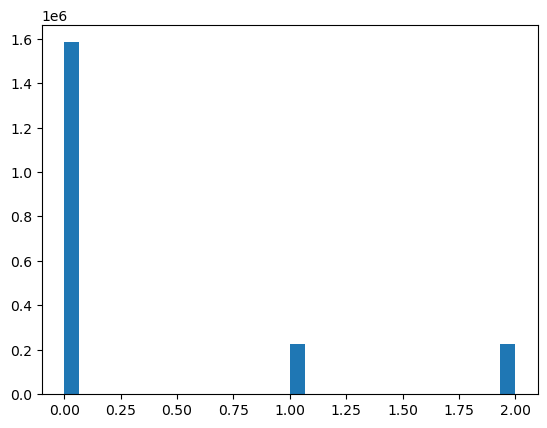

Test loss: 0.4781988561153412
Test accuracy: 0.8113915324211121
Confusion matrix:
[[1282268  168564  133091]
 [  46378  173751    7703]
 [  26167    2899  199395]]


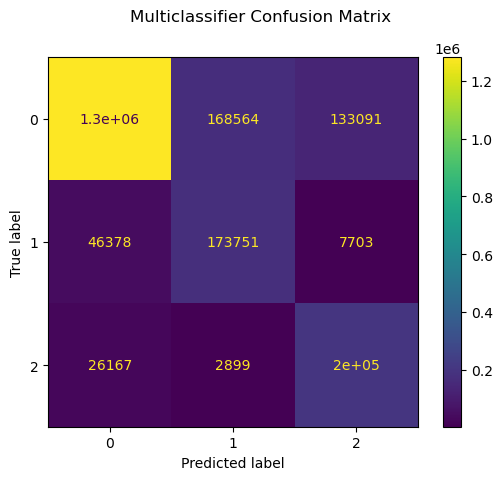

In [5]:
s = 'NoNoise'
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'/Filterloss_{s}.png')
plt.close()

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#np.max(val_acc)
plt.savefig(f'./accuracy_{s}.png')
plt.close()
preds = model.predict(X_test) 
predictionsFiles =np.argmax(preds, axis=1)
pd.DataFrame(predictionsFiles).to_csv(f"./predictionsFiles_{s}.csv",header='predict', index=False)
pd.DataFrame(y_test).to_csv(f"./testResults_{s}.csv",header='true', index=False)
plt.hist(y_test, bins=30)
plt.show()
plt.close()
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictionsFiles)
disp.figure_.suptitle("Multiclassifier Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.savefig(f'./confusionMatrix_{s}.png')
plt.show()
plt.close()
model.save_weights(f'./weights/trained_model_{s}_weights.h5')
model.save(f'./weights/trained_model_{s}.h5')